In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
print(weather_api_key)

a4d6d40801f3e0763db674b53a47d6ac


In [3]:
# Empty list for holding the latitude and longitude combinations.
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


In [4]:
print(cities)

['abepura', 'katsuren-haebaru', 'utrik', 'wailua homesteads', 'grytviken', 'longyearbyen', 'west island', 'lisala', 'waitangi', 'ta`u', 'sandnessjoen', 'guerrero negro', 'yellowknife', 'porto novo', 'edinburgh of the seven seas', 'orcopampa', 'tiksi', 'san antonio de pale', 'markovo', 'port mathurin', 'adamstown', 'hermanus', 'isafjordur', 'iqaluit', 'chonchi', 'cascais', 'chos malal', 'ribeira grande', 'saipan', 'bikenibeu village', 'stanley', 'khabary', 'taulaga', 'hamilton', 'shelton', 'scottburgh', 'vingt cinq', 'reggane', 'puerto natales', "arkhangel'sk", 'vernon', 'hasaki', 'jamestown', 'lebu', 'kununurra', 'bardai', 'karratha', 'alofi', 'hawaiian paradise park', 'arraial do cabo', 'sonqor', 'minas de marcona', 'east london', 'sergeyevka', 'cadale', 'aral', 'balakovo', 'bridgewater', 'blackmans bay', 'bethel', 'port-aux-francais', 'saint-philippe', 'broome', 'pak phanang', 'djougou', 'sidney', 'sihanoukville', 'dudinka', 'yanta', 'carnarvon', 'tanki leendert', 'eureka', 'labrador

In [5]:
# Set the API base URL                                                        https://api.openweathermap.org/data/2.5/weather?
url = f'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abepura
Processing Record 2 of Set 1 | katsuren-haebaru
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | lisala
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | sandnessjoen
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | porto novo
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | orcopampa
Processing Record 17 of Set 1 | tiksi
City not found. Skipping...
Processing Record 18 of Set 1 | san antonio de pale
Processing Record 19 of Set 1 | markovo
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | adamsto

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,abepura,-2.6333,140.5833,32.45,58,20,1.54,ID,1713492651
1,katsuren-haebaru,26.3369,127.8719,25.05,60,20,5.66,JP,1713492653
2,utrik,11.2278,169.8474,26.96,84,8,10.32,MH,1713492654
3,wailua homesteads,22.0669,-159.3780,23.24,85,100,7.72,US,1713492655
4,grytviken,-54.2811,-36.5092,4.24,98,100,0.74,GS,1713492656


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,abepura,-2.6333,140.5833,32.45,58,20,1.54,ID,1713492651
1,katsuren-haebaru,26.3369,127.8719,25.05,60,20,5.66,JP,1713492653
2,utrik,11.2278,169.8474,26.96,84,8,10.32,MH,1713492654
3,wailua homesteads,22.0669,-159.3780,23.24,85,100,7.72,US,1713492655
4,grytviken,-54.2811,-36.5092,4.24,98,100,0.74,GS,1713492656


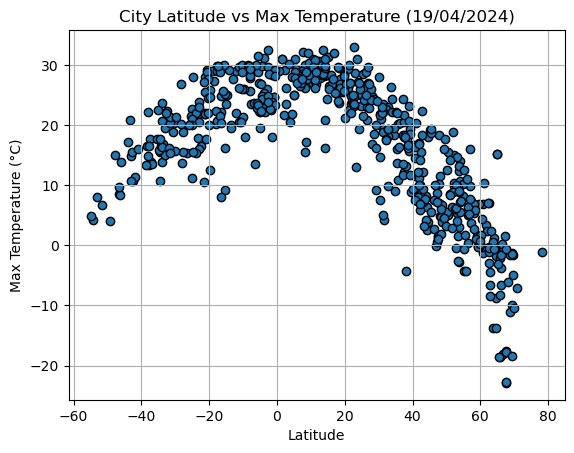

In [23]:
# Build scatter plot for latitude vs. Max temperature:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')


# Incorporate the other graph properties:

# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Max Temperature (°C)')

# Title the scatter plot:
    # Scatter plot has the date of the data collection, 
    # must collect the first date in the dataframe.
timestamp = city_data_df.loc[0, 'Date']
    # Format from the dataframe format into a readable format.
date = datetime.utcfromtimestamp(timestamp)
    # Match the format to the required output.
formatted_date = date.strftime('%d/%m/%Y')

# Title the scatter plot.
plt.title(f'City Latitude vs Max Temperature ({formatted_date})')
# Put a grid onto the scatter plot.
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

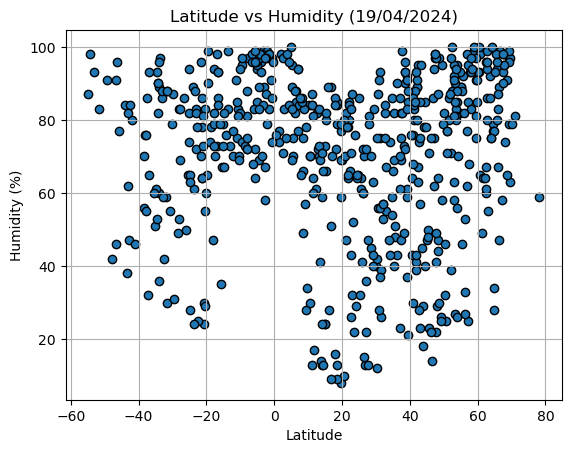

In [21]:
# Build the scatter plots for latitude vs. humidity:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')


# Incorporate the other graph properties:

# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Humidity (%)')

# Title the scatter plot:
    # Scatter plot has the date of the data collection, 
    # must collect the first date in the dataframe.
timestamp = city_data_df.loc[0, 'Date']
    # Format from the dataframe format into a readable format.
date = datetime.utcfromtimestamp(timestamp)
    # Match the format to the required output.
formatted_date = date.strftime('%d/%m/%Y')

# Title the scatter plot.
plt.title(f'City Latitude vs Humidity ({formatted_date})')
# Put a grid onto the scatter plot.
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

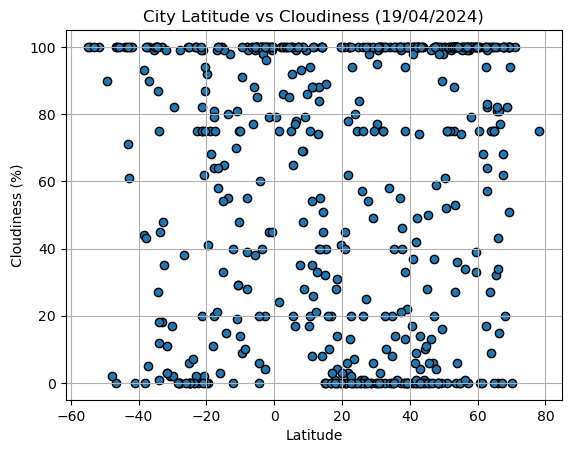

In [24]:
# Build the scatter plots for latitude vs. Cloudiness:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')


# Incorporate the other graph properties:

# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Cloudiness (%)')

# Title the scatter plot:
    # Scatter plot has the date of the data collection, 
    # must collect the first date in the dataframe.
timestamp = city_data_df.loc[0, 'Date']
    # Format from the dataframe format into a readable format.
date = datetime.utcfromtimestamp(timestamp)
    # Match the format to the required output.
formatted_date = date.strftime('%d/%m/%Y')

# Title the scatter plot.
plt.title(f'City Latitude vs Cloudiness ({formatted_date})')
# Put a grid onto the scatter plot.
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

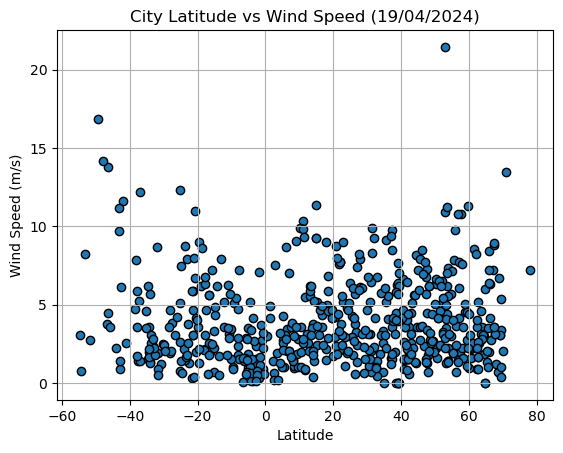

In [25]:
# Build the scatter plots for latitude vs. Wind Speed:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')


# Incorporate the other graph properties:

# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Wind Speed (m/s)')

# Title the scatter plot:
    # Scatter plot has the date of the data collection, 
    # must collect the first date in the dataframe.
timestamp = city_data_df.loc[0, 'Date']
    # Format from the dataframe format into a readable format.
date = datetime.utcfromtimestamp(timestamp)
    # Match the format to the required output.
formatted_date = date.strftime('%d/%m/%Y')

# Title the scatter plot.
plt.title(f'City Latitude vs Wind Speed ({formatted_date})')
# Put a grid onto the scatter plot.
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [43]:
# Define a function to create Linear Regression plots
def Linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = slope * x_values + intercept
    line_eq = "y = " + str(round(slope, 2)) + "*x + " + str(round(intercept, 2))
    
    return x_values, line_eq, regress_values, rvalue

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,katsuren-haebaru,26.3369,127.8719,25.05,60,20,5.66,JP,1713492653
2,utrik,11.2278,169.8474,26.96,84,8,10.32,MH,1713492654
3,wailua homesteads,22.0669,-159.3780,23.24,85,100,7.72,US,1713492655
5,longyearbyen,78.2186,15.6401,-1.09,59,75,7.20,SJ,1713492607
7,lisala,2.1500,21.5167,21.69,98,100,1.39,CD,1713492659


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,abepura,-2.6333,140.5833,32.45,58,20,1.54,ID,1713492651
4,grytviken,-54.2811,-36.5092,4.24,98,100,0.74,GS,1713492656
6,west island,-12.1568,96.8225,28.99,70,40,5.14,CC,1713492658
8,waitangi,-43.9535,-176.5597,17.12,84,100,2.24,NZ,1713492518
9,ta`u,-14.2336,-169.5144,29.22,76,15,6.22,AS,1713492662


The r-value is: 0.7744670506318632


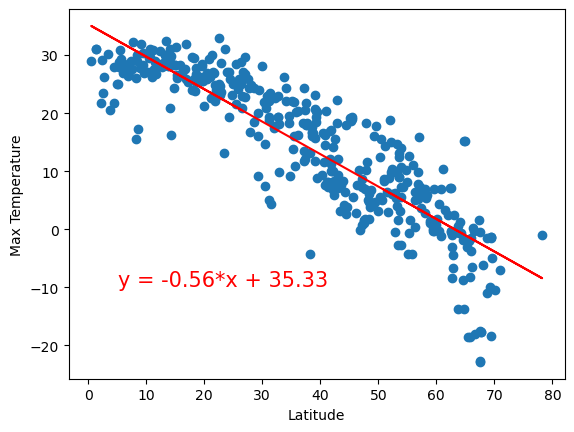

In [82]:
# Linear regression on Northern Hemisphere Max Temp Vs. Latitude:

# Build scatter plot for latitude vs. Max temperature:
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

x_values, line_eq, regress_values, rvalue = Linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

# Incorporate the other graph properties:
# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Max Temperature')

# ANNOTATE the graph with the linear equation relative to the size of the graph.
plt.annotate(line_eq, (0.1, 0.25), xycoords='axes fraction', fontsize = 15, color = 'red')
plt.plot(x_values, regress_values, 'r-')

# Print the r-value.
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.5032476800658201


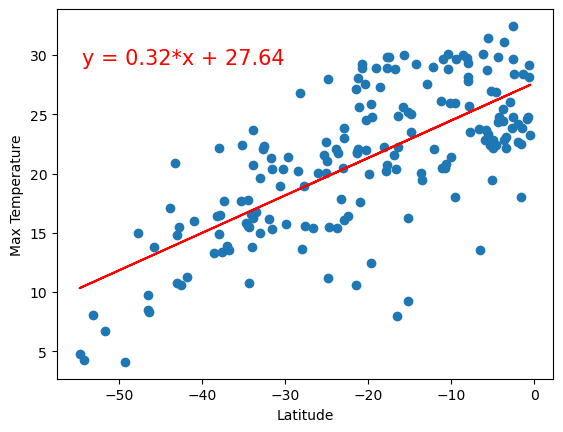

 Discussion about the linear relationship:
 MY DISCUSSION ABOUT LINEAR RELATIONSHIP Max Temperature Vs Latitude


In [133]:
# Linear regression on southern Hemisphere Max Temp Vs. Latitude:

# Build scatter plot for latitude vs. Max temperature:
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

x_values, line_eq, regress_values, rvalue = Linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Incorporate the other graph properties:
# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Max Temperature')

# ANNOTATE the graph with the linear equation relative to the size of the graph.
plt.annotate(line_eq, (0.05, 0.85), xycoords='axes fraction', fontsize = 15, color = 'red')
plt.plot(x_values, regress_values, 'r-')

# Print the r-value.
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Print Discussion of the linear relationship Cloudiness Vs Latitude.
print("\033[1m Discussion about the linear relationship:\033[0m")
print(" MY DISCUSSION ABOUT LINEAR RELATIONSHIP Max Temperature Vs Latitude")

The r-value is: 0.03618233287124113


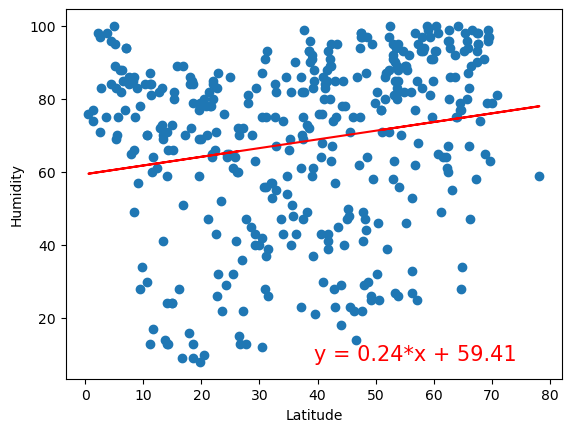

In [94]:
# Linear regression on Northern Hemisphere Humidity Vs. Latitude:

# Build scatter plot for latitude vs. Humidity:
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

x_values, line_eq, regress_values, rvalue = Linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

# Incorporate the other graph properties:
# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Humidity')

# ANNOTATE the graph with the linear equation relative to the size of the graph.
plt.annotate(line_eq, (0.5, 0.05), xycoords='axes fraction', fontsize = 15, color = 'red')
plt.plot(x_values, regress_values, 'r-')

# Print the r-value.
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0912023948104603


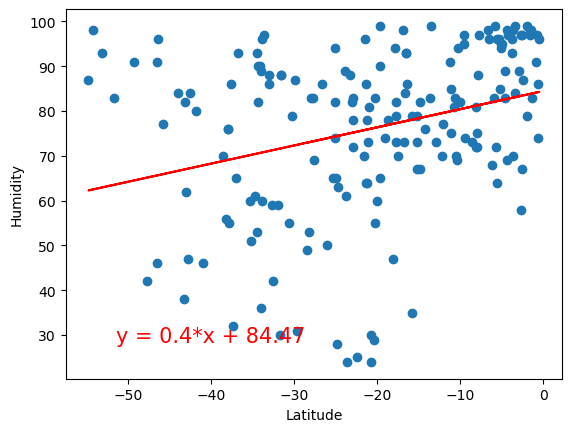

 Discussion about the linear relationship:
 MY DISCUSSION ABOUT LINEAR RELATIONSHIP Humidity Vs Latitude


In [131]:
# Linear regression on southern Hemisphere Humidity Vs. Latitude:

# Build scatter plot for latitude vs. Humidity:
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

x_values, line_eq, regress_values, rvalue = Linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Incorporate the other graph properties:
# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Humidity')

# ANNOTATE the graph with the linear equation relative to the size of the graph.
plt.annotate(line_eq, (0.1, 0.1), xycoords='axes fraction', fontsize = 15, color = 'red')
plt.plot(x_values, regress_values, 'r-')

# Print the r-value.
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Print Discussion of the linear relationship Humidity Vs Latitude.
print("\033[1m Discussion about the linear relationship:\033[0m")
print(" MY DISCUSSION ABOUT LINEAR RELATIONSHIP Humidity Vs Latitude")

The r-value is: 0.02041882015249405


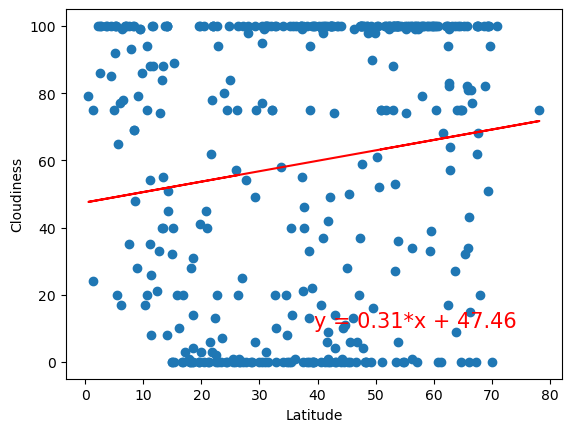

In [104]:
# Linear regression on Northern Hemisphere Cloudiness Vs. Latitude:

# Build scatter plot for latitude vs. Cloudiness:
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

x_values, line_eq, regress_values, rvalue = Linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties:
# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Cloudiness')

# ANNOTATE the graph with the linear equation relative to the size of the graph.
plt.annotate(line_eq, (0.5, 0.14), xycoords='axes fraction', fontsize = 15, color = 'red')
plt.plot(x_values, regress_values, 'r-')

# Print the r-value.
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0074776640556715535


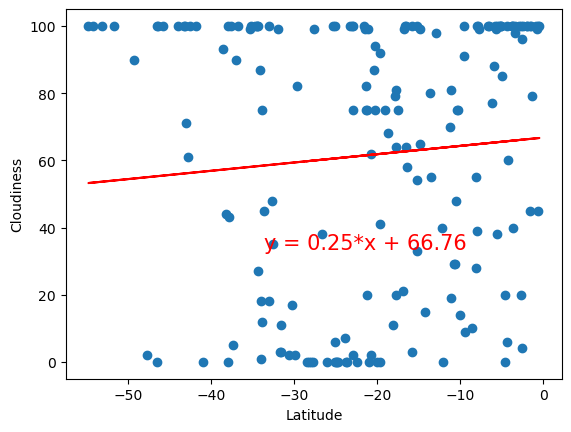

In [107]:
# Linear regression on southern Hemisphere Cloudiness Vs. Latitude:

# Build scatter plot for latitude vs. Cloudiness:
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

x_values, line_eq, regress_values, rvalue = Linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties:
# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Cloudiness')

# ANNOTATE the graph with the linear equation relative to the size of the graph.
plt.annotate(line_eq, (0.4, 0.35), xycoords='axes fraction', fontsize = 15, color = 'red')
plt.plot(x_values, regress_values, 'r-')

# Print the r-value.
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Print Discussion of the linear relationship Cloudiness Vs Latitude.
print("\033[1m Discussion about the linear relationship:\033[0m")
print(" MY DISCUSSION ABOUT LINEAR RELATIONSHIP Cloudiness Vs Latitude")

The r-value is: 0.002288196399034442


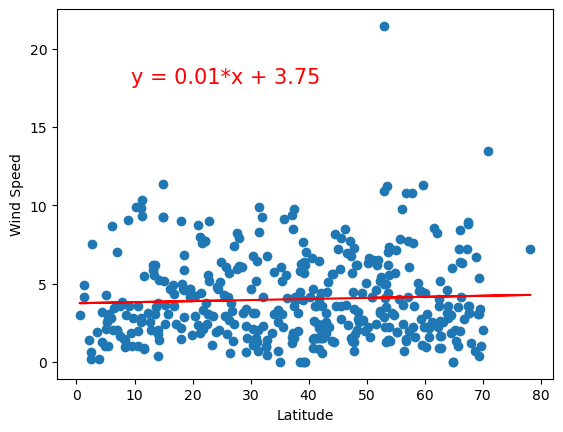

In [134]:
# Linear regression on Northern Wind Speed Vs. Latitude:

# Build scatter plot for latitude vs. Wind Speed:
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

x_values, line_eq, regress_values, rvalue = Linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties:
# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Wind Speed')

# ANNOTATE the graph with the linear equation relative to the size of the graph.
plt.annotate(line_eq, (0.15, 0.8), xycoords='axes fraction', fontsize = 15, color = 'red')
plt.plot(x_values, regress_values, 'r-')

# Print the r-value.
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.12053235897825548


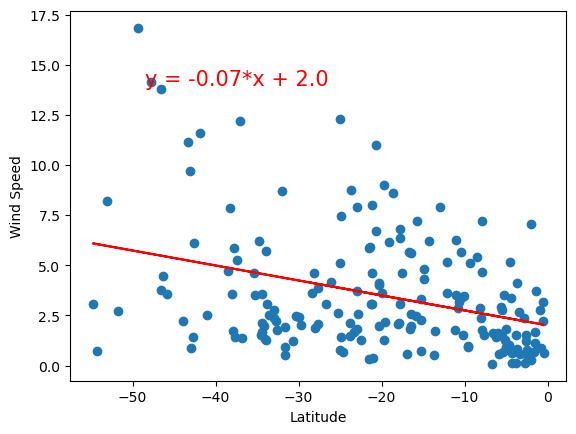

 Discussion about the linear relationship:
 MY DISCUSSION ABOUT LINEAR RELATIONSHIP BLAH BLAH BLAH


In [136]:
# Linear regression on southern Hemisphere Wind Speed Vs. Latitude:

# Build scatter plot for latitude vs. Wind Speed:
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

x_values, line_eq, regress_values, rvalue = Linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties:
# Label The X-Axis
plt.xlabel('Latitude')
# Label The Y-Axis
plt.ylabel('Wind Speed')

# ANNOTATE the graph with the linear equation relative to the size of the graph.
plt.annotate(line_eq, (0.15, 0.8), xycoords='axes fraction', fontsize = 15, color = 'red')
plt.plot(x_values, regress_values, 'r-')

# Print the r-value.
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Print Discussion of the linear relationship Wind Speed Vs Latitude.
print("\033[1m Discussion about the linear relationship:\033[0m")
print(" MY DISCUSSION ABOUT LINEAR RELATIONSHIP BLAH BLAH BLAH")